In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import seaborn as sns

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Code 3.2

In [59]:
p_grid    = np.linspace ( 0, 1, 100)
prob_p    = np.repeat (1, 100)
prob_data = stats.binom.pmf ( 6, 9, p_grid)
posterior = prob_p * prob_data
posterior = posterior / sum (posterior)

Sample from the posterior distribution

In [60]:
#samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
samples = np.random.choice ( a = p_grid, p=posterior, size = 10000, replace=True )


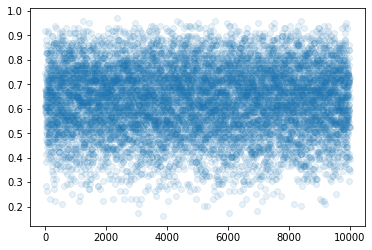

In [39]:
plt.plot (samples, 'o', alpha=0.1  )


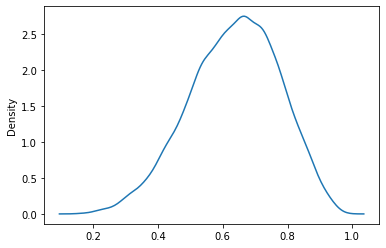

In [40]:
sns.kdeplot ( samples)

Summarizing the Samples from the Posterior

Code 3.7

In [6]:
sum(posterior[ p_grid < 0.5 ])

0.17183313110747472

Code 3.8

In [7]:
sum ( samples < 0.5 ) /   len (samples)

0.1717

Code 3.9

In [44]:
np.percentile(samples,80)

0.7575757575757577

Figure 3.3

Highlight the density/mass  that:
- Has a value of 50% or less
- Has a value between 50-75%
- Occupies the lower 80% of the density.
- Middle 80% of the probability around the average point.

Text(0, 0.5, 'Density')

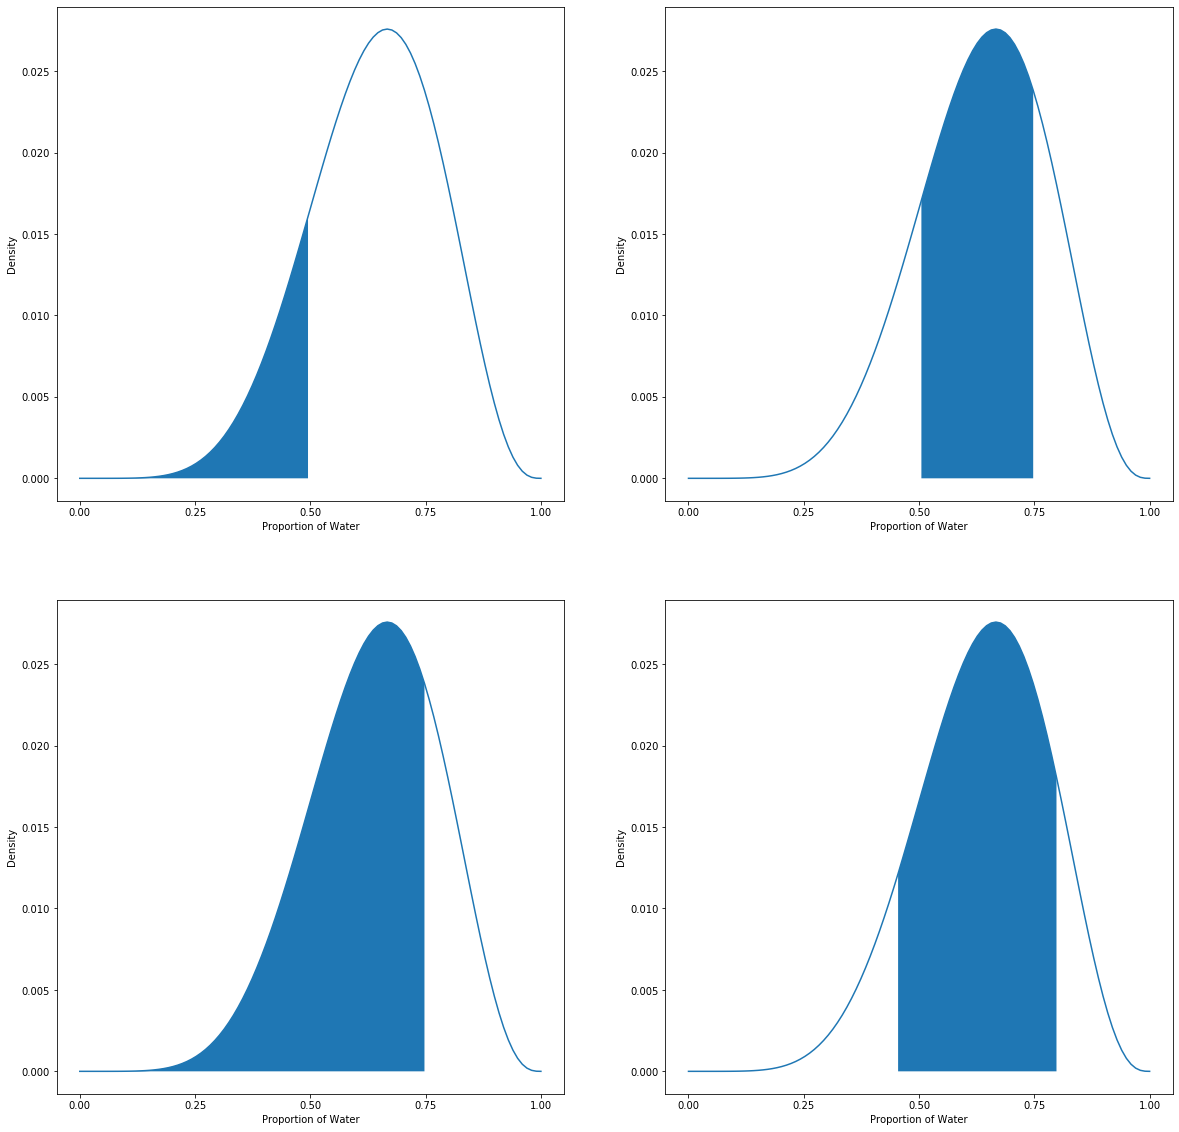

In [61]:
# wider figure
# wider figure
plt.figure(figsize=(20,20)) 


plt.subplot(2, 2, 1)
plt.plot (  p_grid, posterior, '-'   )
plt.fill_between (p_grid, posterior, where=(p_grid < 0.5  ) )
plt.xticks ( [0, 0.25, 0.5, 0.75, 1] )
plt.xlabel ('Proportion of Water')
plt.ylabel ('Density')


plt.subplot ( 2,2,2 )
plt.plot (  p_grid, posterior, '-'   )
plt.fill_between (p_grid, posterior, where=(p_grid > 0.5) & (p_grid  < 0.75 ) )
plt.xticks ( [0, 0.25, 0.5, 0.75, 1] )
plt.xlabel ('Proportion of Water')
plt.ylabel ('Density')


plt.subplot ( 2,2,3 )
plt.plot (  p_grid, posterior, '-'   )
plt.fill_between(p_grid, posterior, where = p_grid < np.percentile(samples, 80))
plt.xticks ( [0, 0.25, 0.5, 0.75, 1] )
plt.xlabel ('Proportion of Water')
plt.ylabel ('Density')

plt.subplot ( 2,2,4 )
plt.plot (  p_grid, posterior, '-'   )
plt.fill_between(p_grid, posterior, where =    ( p_grid > np.percentile(samples, 10))  & 
                                               ( p_grid < np.percentile(samples, 90)) )
plt.xticks ( [0, 0.25, 0.5, 0.75, 1] )
plt.xlabel ('Proportion of Water')
plt.ylabel ('Density')




3.13

In [49]:
#az.hpd(samples, credible_interval=0.5)

### Function to generate posterior distribution

In [50]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

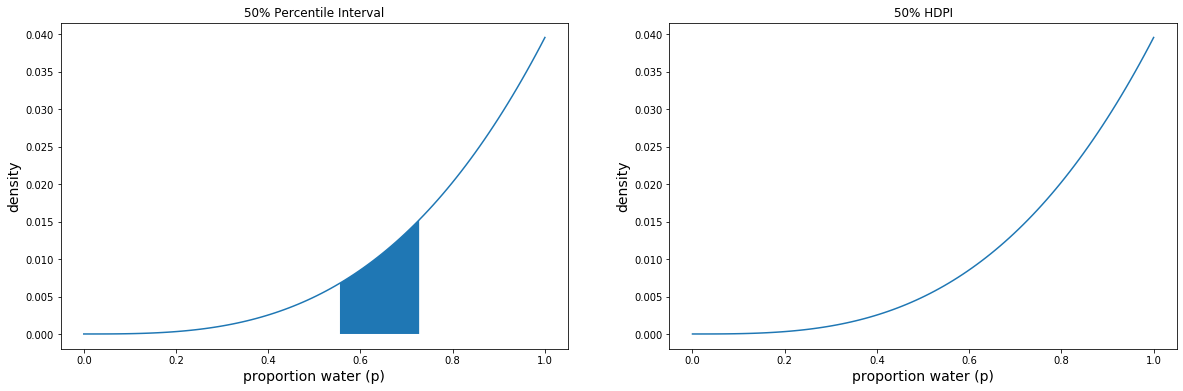

In [62]:
#Figure 3.3
# wider figure
plt.figure(figsize=(20,6)) 

# calculate posterior: 
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)

# PI
pi_interval = np.percentile(samples, [25, 75])

# PI Plot
plt.subplot(1, 2, 1)
plt.plot(p_grid, posterior)
plt.xlabel('proportion water (p)', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.fill_between(p_grid, posterior, where = (p_grid > pi_interval[0]) & (p_grid < pi_interval[1]))
plt.title('50% Percentile Interval')

# HDPI
#hdpi_interval = az.hpd(samples, credible_interval=0.5)

# HDPI Plot
plt.subplot(1, 2, 2)
plt.plot(p_grid, posterior)
plt.xlabel('proportion water (p)', fontsize=14)
plt.ylabel('density', fontsize=14)

#plt.fill_between(p_grid, posterior, where = (p_grid > hdpi_interval[0]) & (p_grid < hdpi_interval[1]))
plt.title('50% HDPI');

3.12

In [72]:
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
np.percentile(samples, [25, 75])

array([0.70707071, 0.93939394])

3.13

compute highest posterior density interval

In [ ]:
#az.hpd(samples, credible_interval=0.5)

3.14

In [55]:
#max(posterior)
p_grid[posterior == max(posterior)]

array([1.])

3.15

In [56]:
stats.mode(samples)[0]

array([1.])

3.16

np.mean (samples), np.median (samples)

3.17

3.18 / 3.19

Find the loss for the median point.

In [70]:
loss = [sum ( posterior * abs ( p - p_grid ) ) for p in p_grid]
p_grid [ loss == min (loss)]

array([0.84848485])

3.20

In [75]:
stats.binom.pmf([0,1,2], n=2, p=0.7)


array([0.09, 0.42, 0.49])

3.21

In [84]:
# size: number of examples to generate
# n   : number of trials 
# So there are 10 experiments with 2 trials each
stats.binom.rvs(n=2, p=0.7, size=2)

array([1, 2])

3.22

In [85]:
stats.binom.rvs(n=2, p=0.7, size=10)

array([2, 2, 1, 1, 2, 1, 2, 2, 1, 1])

3.25

Generate probabilities just using a point estimate

In [95]:
dummy_w = stats.binom.rvs(n=9, p=0.7, size= int(1e5) )

figure 3.5

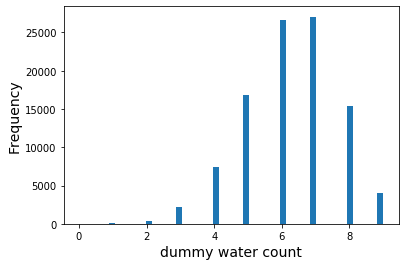

In [96]:
#dummy_w = stats.binom.rvs(n=9, p=samples)
plt.hist(dummy_w, bins=50)
plt.xlabel('dummy water count', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

3.26

Now sample again but this time sample from samples. samples is a sampling of probability values from the posterior. 


In [104]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
samples

array([0.65656566, 0.55555556, 0.61616162, ..., 0.5959596 , 0.36363636,
       0.44444444])

In [107]:
r_grid = list ( range ( 100, 300, 1) )
#p = 0.2
#ML_probs = stats.binom.pmf ( k=r_grid, n=campaign_size, p=p)

